# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
#Fetching response data (BTC) 
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
#Fetching response data (ETH) 
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))
#api_




# Compute current value of my crpto
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18736225,
            "total_supply": 18736225,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39905.0,
                    "volume_24h": 33989934850,
                    "market_cap": 749637068902,
                    "percentage_change_1h": -0.657479765170442,
                    "percentage_change_24h": -0.500611410028903,
                    "percentage_change_7d": 18.9162996310131,
                    "percent_change_1h": -0.657479765170442,
                    "percent_change_24h": -0.500611410028903,
                    "percent_change_7d": 18.9162996310131
                },
                "CAD": {
                    "price": 48628.233,
                    "volume_24h": 41420134608.21,
                    

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today, limit=1000).df
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3589312  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62467863

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Consolidate financial assets data and create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,61151.635
shares,40938.500


<AxesSubplot:title={'center':'Personal Savings Composition  '}, ylabel='amount'>

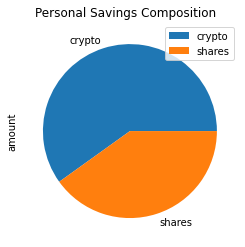

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition  ")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                          SPY            \
              open      high       low   close   volume    open      high   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469  369.02  369.6200   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353  367.72  370.7800   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359  370.88  371.0500   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024  365.37  367.8600   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449  364.90  366.7402   

                                        
               low     close    volume  
2020-12-07  367.72  369.1200  40456544  
2020-12-08  367.67  370.1599  32702217  
2020-12-09  365.95  366.8900  60700254  
2020-12-10  364.43  366.7200  47851654  
2020-12-11  363.26  366.2800  47917103

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469          NaN  369.02   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353     0.000170  367.72   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359    -0.001274  370.88   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024     0.002211  365.37   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449     0.001272  364.90   

                                                               
                high     low     close    volume daily_return  
2020-12-07  369.6200  367.72  369.1200  40456544          NaN  
2020-12-08  370.7800  367.67  370.1599  32702217     0.002817  
2020-12-09  371.0500  365.95  366.8900  60700254    -0.008834  
2020-12-10  367.8600  364.43  366.7200  47851654    -0.000463  
2020-12-11  366.7402  363.26  366.2800  47917103    -0.001200

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994492,1.011306,1.005224,0.999011,1.012055,1.005983,1.000007,0.994284,1.004720,0.996060,...,1.000431,0.999233,0.997329,1.005351,0.997010,0.997751,1.003133,0.999454,1.002317,1.001295
2,0.990503,1.009588,1.004226,1.003184,1.006516,0.997519,0.995810,0.995478,1.005626,1.000646,...,0.993541,1.005109,0.995227,1.003135,1.001006,0.986525,1.014426,0.998315,1.003813,1.005369
3,0.996991,1.012904,1.007788,1.003244,1.001461,1.001892,0.996623,1.007110,1.003002,1.003214,...,0.992223,1.010101,1.001112,1.004739,1.001098,0.990614,1.012865,1.000415,1.007132,1.001777
4,0.997721,1.010816,1.012249,0.998924,1.003044,1.006160,0.991685,1.007377,0.991788,0.990242,...,0.986344,1.009577,1.002663,1.003647,1.000478,0.999269,1.008774,1.000379,1.004293,1.006589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,111.785599,113.958570,44.850912,257.056304,130.262295,134.715901,154.056923,76.157318,138.816794,115.844970,...,85.388489,316.914032,98.370435,82.630107,164.947050,419.511832,100.457112,70.202312,160.356069,87.096010
7557,112.003599,114.659077,44.650867,255.906319,130.008424,135.000237,154.440728,76.021024,138.408825,116.507689,...,85.449446,318.461569,98.820095,82.765169,166.070330,419.782995,100.897380,69.599963,160.165210,87.202860
7558,112.948852,115.087007,44.546570,254.820680,129.863957,134.813440,153.673736,75.749454,137.549048,116.303008,...,85.631756,317.815777,99.091160,83.265524,166.020517,421.243744,100.595359,69.678057,160.123501,87.670950
7559,113.637625,115.972963,44.565654,256.445626,130.327303,133.708782,153.522988,75.588542,137.382290,115.304165,...,85.731524,314.437297,99.100329,83.498566,166.314660,424.722172,99.715928,69.269239,160.819391,87.855623


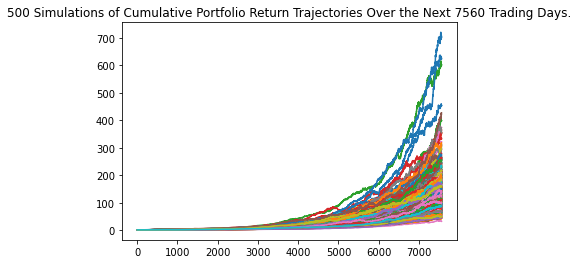

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

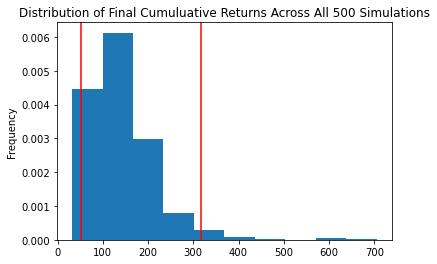

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            142.369677
std              75.919012
min              32.327236
25%              93.768131
50%             125.628390
75%             174.615395
max             705.024131
95% CI Lower     52.449564
95% CI Upper    317.449645
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1048991.28 and $6348992.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1573486.91 and $9523489.36


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469          NaN  369.02   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353     0.000170  367.72   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359    -0.001274  370.88   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024     0.002211  365.37   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449     0.001272  364.90   

                                                               
                high     low     close    volume daily_return  
2020-12-07  369.6200  367.72  369.1200  40456544          NaN  
2020-12-08  370.7800  367.67  370.1599  32702217     0.002817  
2020-12-09  371.0500  365.95  366.8900  60700254    -0.008834  
2020-12-10  367.8600  364.43  366.7200  47851654    -0.000463  
2020-12-11  366.7402  363.26  366.2800  47917103    -0.001200

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996956,1.000324,1.004073,1.003017,1.014406,0.995537,0.988968,1.003357,0.995244,1.005209,...,1.009410,0.996155,0.993829,1.006416,1.003436,0.997664,1.002687,0.997580,1.005569,1.009637
2,0.993845,1.005362,1.011635,0.996185,1.019242,0.996891,0.988413,1.004386,0.995162,1.007619,...,1.017045,0.989789,0.997804,1.015548,1.003303,1.000228,1.004240,0.991379,0.999439,1.010259
3,0.995905,1.007264,1.001830,0.998127,1.016655,1.000378,0.987730,1.005299,0.999731,1.010756,...,1.019237,0.978517,1.003465,1.022025,0.999466,1.004677,1.007145,0.996712,1.004864,1.009994
4,1.004173,1.002205,1.001492,0.997127,1.019550,1.003256,0.983543,0.996098,0.998235,1.013777,...,1.025764,0.985803,1.006926,1.016156,1.005873,1.005584,1.017000,0.998914,1.005746,1.022956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.048100,1.942042,2.109548,2.134868,2.861985,2.810560,2.110689,2.213482,2.510656,2.107973,...,2.924289,2.964485,2.001148,2.750096,2.235900,1.801636,2.879843,1.910772,2.484710,2.481963
1257,3.045547,1.947894,2.121910,2.139948,2.894500,2.825895,2.096061,2.234690,2.493342,2.100307,...,2.939731,2.953377,2.015573,2.754170,2.251896,1.797732,2.881172,1.901399,2.484740,2.483397
1258,3.051506,1.949965,2.120625,2.127283,2.901693,2.814251,2.099975,2.240114,2.474713,2.097939,...,2.921324,2.975024,2.026521,2.747323,2.265552,1.788319,2.906529,1.897313,2.498566,2.514067
1259,3.033406,1.941859,2.118069,2.114984,2.895928,2.804076,2.101738,2.243580,2.460998,2.103283,...,2.911513,2.987067,2.042765,2.757489,2.285994,1.794981,2.902235,1.881436,2.485775,2.534741


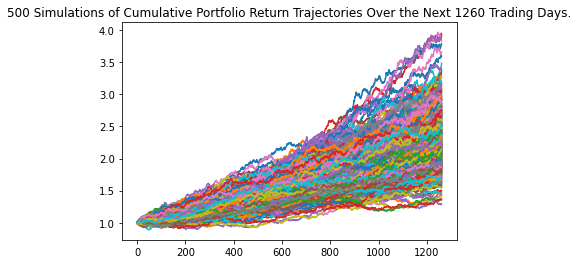

In [26]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

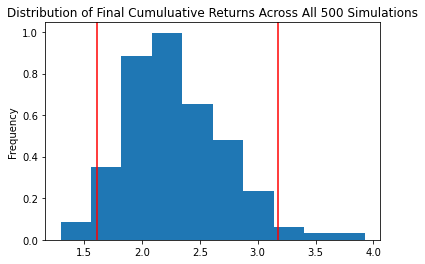

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.284226
std               0.426868
min               1.295839
25%               1.967037
50%               2.231186
75%               2.538615
max               3.925560
95% CI Lower      1.607134
95% CI Upper      3.177743
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $96428.02 and $190664.61


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469          NaN  369.02   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353     0.000170  367.72   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359    -0.001274  370.88   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024     0.002211  365.37   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449     0.001272  364.90   

                                                               
                high     low     close    volume daily_return  
2020-12-07  369.6200  367.72  369.1200  40456544          NaN  
2020-12-08  370.7800  367.67  370.1599  32702217     0.002817  
2020-12-09  371.0500  365.95  366.8900  60700254    -0.008834  
2020-12-10  367.8600  364.43  366.7200  47851654    -0.000463  
2020-12-11  366.7402  363.26  366.2800  47917103    -0.001200

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998587,1.009341,0.994754,1.005277,0.994424,0.998928,0.997172,0.994088,1.009538,0.998296,...,0.990360,1.006709,0.996505,0.995776,1.004373,1.001506,1.004222,1.005790,1.001825,0.999998
2,0.994008,1.004276,0.990655,1.007160,0.992649,1.005652,1.000546,0.997287,1.008574,0.999785,...,1.004612,1.004589,1.007977,0.985147,1.010780,0.999055,0.995470,1.001993,1.007813,1.002515
3,0.990810,0.998808,0.998725,1.009802,0.994701,1.010736,0.999790,0.995297,0.996676,1.003483,...,1.002655,1.007699,1.007671,0.991509,1.013337,1.006373,1.000245,1.010422,1.012842,1.003561
4,0.990040,1.008427,0.985633,1.012911,0.997580,1.013409,0.999218,0.987045,1.001261,0.999607,...,1.004876,1.009559,1.007565,0.991464,1.016106,1.010212,0.991545,1.015058,1.020857,1.001207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.633777,7.195171,6.854605,7.402269,5.190269,7.416412,5.474708,7.659539,4.431130,6.151434,...,6.248407,5.397918,8.531290,4.184957,6.335320,4.453009,8.697417,3.632414,3.745507,4.358584
2517,5.678766,7.249628,6.912753,7.438377,5.167604,7.395071,5.479017,7.720693,4.480112,6.168352,...,6.219030,5.411248,8.497497,4.217104,6.348368,4.434413,8.678603,3.623273,3.734067,4.348889
2518,5.733293,7.302776,6.848136,7.444663,5.147151,7.432026,5.542677,7.717553,4.456293,6.153297,...,6.189485,5.366645,8.521435,4.248440,6.341739,4.412268,8.655599,3.601113,3.752778,4.378483
2519,5.766345,7.288753,6.852574,7.500249,5.195445,7.487291,5.527267,7.693443,4.472875,6.132841,...,6.242553,5.357524,8.506016,4.266377,6.406864,4.432123,8.671170,3.591363,3.719859,4.437029


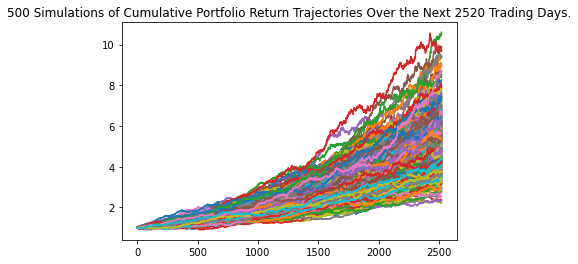

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

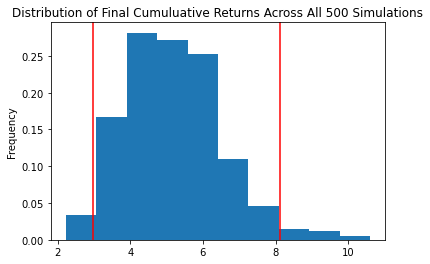

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              5.182860
std               1.317409
min               2.222274
25%               4.233966
50%               5.088552
75%               5.976863
max              10.606326
95% CI Lower      2.981852
95% CI Upper      8.135794
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $178911.12 and $488147.66
